In [367]:
# NBA Stats Analysis

## Import Libraries


# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Additional libraries
import os

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


In [368]:
# List of CSV files
csv_files = [
    'team_core.csv',
    'basic_per_game.csv',
    'per_game_yoy.csv',
    'rank_per_game.csv',
    'rost_cont.csv',
    'preseason_odds.csv'
]

# Load all CSV files into a dictionary of DataFrames
data_frames = {}
for file in csv_files:
    df_name = os.path.splitext(file)[0]
    data_frames[df_name] = pd.read_csv(file)

# Display the keys of the dictionary to confirm successful loading
print(data_frames.keys())


dict_keys(['team_core', 'basic_per_game', 'per_game_yoy', 'rank_per_game', 'rost_cont', 'preseason_odds'])


In [369]:
# Display the first few rows of each DataFrame
for name, df in data_frames.items():
    print(f"DataFrame: {name}")
    display(df.head())

DataFrame: team_core


,team,season,wins,losses,win_loss_pct,rank_team,srs,pace,rel_pace,off_rtg,rel_off_rtg,def_rtg,rel_def_rtg,playoffs,coaches
0,ATL,2024-25,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q. Snyder
1,ATL,2023-24,36,46,0.439,3rd of 5,-2.38,100.1,1.6,117.2,1.9,119.4,4.1,NaN,Q. Snyder
2,ATL,2022-23,41,41,0.500,2nd of 5,0.32,100.7,1.6,116.6,1.8,116.3,1.5,Lost E. Conf. 1st Rnd.,N. McMillan
3,ATL,2021-22,43,39,0.524,2nd of 5,1.55,97.7,-0.5,116.5,4.5,114.9,2.9,Lost E. Conf. 1st Rnd.,N. McMillan
4,ATL,2020-21,41,31,0.569,1st of 5,2.14,97.6,-1.6,115.7,3.4,113.3,1.0,Lost E. Conf. Finals,L. Pierce


DataFrame: basic_per_game


,team,season,avg_age,avg_height,avg_weight,fg_per_game,fga_per_game,fg_pct,3p_per_game,3pa_per_game,...,ft_pct,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
0,ATL,2023-24,26.2,6-6,211.0,43.0,92.5,0.465,13.7,37.7,...,0.797,12.5,32.2,44.7,26.6,7.5,4.5,13.5,18.6,118.3
1,ATL,2022-23,24.9,6-6,210.0,44.6,92.4,0.483,10.8,30.5,...,0.818,11.2,33.2,44.4,25.0,7.1,4.9,12.9,18.8,118.4
2,ATL,2021-22,26.1,6-6,211.0,41.5,88.3,0.470,12.9,34.4,...,0.812,10.0,33.9,44.0,24.6,7.2,4.2,11.9,18.7,113.9
3,ATL,2020-21,25.4,6-6,212.0,40.8,87.2,0.468,12.4,33.4,...,0.812,10.6,35.1,45.6,24.1,7.0,4.8,13.2,19.3,113.7
4,ATL,2019-20,24.1,6-6,213.0,40.6,90.6,0.449,12.0,36.1,...,0.790,9.9,33.4,43.3,24.0,7.8,5.1,16.2,23.1,111.8


DataFrame: per_game_yoy


,team,season,avg_age_yoy,avg_height_yoy,avg_weight_yoy,fg_yoy,fga_yoy,fg_pct_yoy,3p_yoy,3pa_yoy,...,ft_pct_yoy,orb_yoy,drb_yoy,trb_yoy,ast_yoy,stl_yoy,blk_yoy,tov_yoy,pf_yoy,pts_yoy
0,ATL,2023-24,5.2%,0.1%,0.5%,-3.5%,0.1%,-0.018,27.6%,23.4%,...,-0.020,11.3%,-2.9%,0.7%,6.4%,6.0%,-8.0%,4.7%,-1.2%,-0.1%
1,ATL,2022-23,-4.6%,-0.5%,-0.5%,7.6%,4.6%,0.013,-16.5%,-11.2%,...,0.006,11.8%,-2.3%,0.9%,1.6%,-1.2%,15.2%,9.1%,0.5%,3.9%
2,ATL,2021-22,2.8%,0.4%,-0.5%,1.7%,1.2%,0.002,3.6%,3.1%,...,-0.000,-4.9%,-3.2%,-3.6%,2.0%,2.5%,-10.7%,-10.4%,-3.2%,0.2%
3,ATL,2020-21,5.4%,-0.5%,-0.5%,0.4%,-3.7%,0.019,3.5%,-7.5%,...,0.022,7.0%,5.0%,5.5%,0.7%,-10.5%,-6.7%,-18.3%,-16.3%,1.7%
4,ATL,2019-20,-4.0%,0.4%,0.0%,-1.8%,-1.3%,-0.002,-7.7%,-2.5%,...,0.038,-15.3%,-3.1%,-6.2%,-7.3%,-5.2%,-0.4%,-4.9%,-1.9%,-1.4%


DataFrame: rank_per_game


,team,season,avg_age_rank,avg_height_rank,avg_weight_rank,fg_rank,fga_rank,fg_pct_rank,3p_rank,3pa_rank,...,ft_pct_rank,orb_rank,drb_rank,trb_rank,ast_rank,stl_rank,blk_rank,tov_rank,pf_rank,pts_rank
0,ATL,2023-24,15.0,22.0,26.0,10.0,2.0,21.0,6.0,7.0,...,8.0,3.0,22.0,6.0,16.0,16.0,26.0,16.0,15.0,5.0
1,ATL,2022-23,22.0,21.0,27.0,1.0,3.0,9.0,26.0,28.0,...,3.0,9.0,12.0,10.0,18.0,18.0,12.0,3.0,6.0,3.0
2,ATL,2021-22,13.0,6.0,25.0,11.0,13.0,7.0,11.0,18.0,...,4.0,17.0,17.0,20.0,15.0,22.0,23.0,1.0,7.0,6.0
3,ATL,2020-21,22.0,12.0,26.0,19.0,23.0,17.0,17.0,19.0,...,5.0,7.0,10.0,5.0,19.0,24.0,17.0,9.0,18.0,13.0
4,ATL,2019-20,29.0,7.0,24.0,17.0,7.0,23.0,16.0,8.0,...,10.0,19.0,23.0,22.0,17.0,13.0,12.0,28.0,30.0,17.0


DataFrame: rost_cont


,season,team,roster_continuity
0,2023-24,ATL,95%
1,2022-23,ATL,65%
2,2021-22,ATL,84%
3,2020-21,ATL,48%
4,2019-20,ATL,49%


DataFrame: preseason_odds


,season,team,Odds,wins_ou,Likelihood
0,1984-85,BOS,200,NaN,0.333333
1,1984-85,LAL,200,NaN,0.333333
2,1984-85,PHI,250,NaN,0.285714
3,1984-85,NYK,500,NaN,0.166667
4,1984-85,DET,600,NaN,0.142857


In [370]:
# Update 'playoffs' column to 'Missed Playoffs' for N/A values
for name, df in data_frames.items():
    if 'playoffs' in df.columns:
        df['playoffs'] = df['playoffs'].fillna('Missed Playoffs')



# Handling missing values, if any
for name, df in data_frames.items():
    print(f"Missing values in {name}:")
    print(df.isnull().sum())

# Dropping rows with missing values (if applicable)
for name, df in data_frames.items():
    data_frames[name] = df.dropna()

# Convert columns to appropriate data types (if necessary)
# Example: Convert 'season' column to datetime
for name, df in data_frames.items():
    if 'season' in df.columns:
        data_frames[name]['season'] = df['season'].apply(lambda x: pd.to_datetime(x.split('-')[0] + '-01-01'))
    if 'roster_continuity' in df.columns:
        # Remove the '%' and convert to numeric
        data_frames[name]['roster_continuity'] = df['roster_continuity'].apply(lambda x: float(x.replace('%', '')) * 0.01)
        # Apply formatting
        data_frames[name]['roster_continuity'] = data_frames[name]['roster_continuity'].apply(lambda x: "{0:.2f}".format(x))
        data_frames[name]['roster_continuity'] = data_frames[name]['roster_continuity'].map(float)



for name, df in data_frames.items():
    if name == 'per_game_yoy':
        for col in df.columns:
            if col != 'team' and col != 'season':
                # Convert percentage strings to floats
                data_frames[name][col] = df[col].apply(lambda x: float(x.replace('%', '')) * 0.01 if isinstance(x, str) else x)

playoff_mapping = {
    'Missed Playoffs': 0,
    'Lost E. Conf. 1st Rnd.': 1,
    'Lost W. Conf. 1st Rnd.': 1,
    'Lost E. Conf. Semis': 2,
    'Lost W. Conf. Semis': 2,
    'Lost E. Conf. Finals': 3,
    'Lost W. Conf. Finals': 3,
    'Lost Finals': 4,
    'Won Finals': 5
}

# Add outcome variable to the DataFrame
for name, df in data_frames.items():
    if 'playoffs' in df.columns:
        df['outcome'] = df['playoffs'].map(playoff_mapping)
# Display the cleaned data
for name, df in data_frames.items():
    print(f"Cleaned DataFrame: {name}")
    display(df.head())


Missing values in team_core:
team             0
season           0
wins             0
losses           0
win_loss_pct    30
rank_team       30
srs             30
pace            50
rel_pace        50
off_rtg         50
rel_off_rtg     50
def_rtg         50
rel_def_rtg     50
playoffs         0
coaches          0
dtype: int64
Missing values in basic_per_game:
team              0
season           62
avg_age          90
avg_height       90
avg_weight       90
fg_per_game      62
fga_per_game     62
fg_pct           62
3p_per_game     435
3pa_per_game    435
3p_pct          435
2p_per_game      62
2pa_per_game     62
2p_pct           62
ft_per_game      62
fta_per_game     62
ft_pct           62
orb_per_game    320
drb_per_game    320
trb_per_game     82
ast_per_game     62
stl_per_game    340
blk_per_game    340
tov_per_game    263
pf_per_game      62
pts_per_game     62
dtype: int64
Missing values in per_game_yoy:
team                0
season             62
avg_age_yoy       121
avg_heig

,team,season,wins,losses,win_loss_pct,rank_team,srs,pace,rel_pace,off_rtg,rel_off_rtg,def_rtg,rel_def_rtg,playoffs,coaches,outcome
1,ATL,2023-01-01,36,46,0.439,3rd of 5,-2.38,100.1,1.6,117.2,1.9,119.4,4.1,Missed Playoffs,Q. Snyder,0.0
2,ATL,2022-01-01,41,41,0.500,2nd of 5,0.32,100.7,1.6,116.6,1.8,116.3,1.5,Lost E. Conf. 1st Rnd.,N. McMillan,1.0
3,ATL,2021-01-01,43,39,0.524,2nd of 5,1.55,97.7,-0.5,116.5,4.5,114.9,2.9,Lost E. Conf. 1st Rnd.,N. McMillan,1.0
4,ATL,2020-01-01,41,31,0.569,1st of 5,2.14,97.6,-1.6,115.7,3.4,113.3,1.0,Lost E. Conf. Finals,L. Pierce,3.0
5,ATL,2019-01-01,20,47,0.299,5th of 5,-7.71,103.0,2.7,107.2,-3.4,114.8,4.2,Missed Playoffs,L. Pierce,0.0


Cleaned DataFrame: basic_per_game


,team,season,avg_age,avg_height,avg_weight,fg_per_game,fga_per_game,fg_pct,3p_per_game,3pa_per_game,...,ft_pct,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
0,ATL,2023-01-01,26.2,6-6,211.0,43.0,92.5,0.465,13.7,37.7,...,0.797,12.5,32.2,44.7,26.6,7.5,4.5,13.5,18.6,118.3
1,ATL,2022-01-01,24.9,6-6,210.0,44.6,92.4,0.483,10.8,30.5,...,0.818,11.2,33.2,44.4,25.0,7.1,4.9,12.9,18.8,118.4
2,ATL,2021-01-01,26.1,6-6,211.0,41.5,88.3,0.470,12.9,34.4,...,0.812,10.0,33.9,44.0,24.6,7.2,4.2,11.9,18.7,113.9
3,ATL,2020-01-01,25.4,6-6,212.0,40.8,87.2,0.468,12.4,33.4,...,0.812,10.6,35.1,45.6,24.1,7.0,4.8,13.2,19.3,113.7
4,ATL,2019-01-01,24.1,6-6,213.0,40.6,90.6,0.449,12.0,36.1,...,0.790,9.9,33.4,43.3,24.0,7.8,5.1,16.2,23.1,111.8


Cleaned DataFrame: per_game_yoy


,team,season,avg_age_yoy,avg_height_yoy,avg_weight_yoy,fg_yoy,fga_yoy,fg_pct_yoy,3p_yoy,3pa_yoy,...,ft_pct_yoy,orb_yoy,drb_yoy,trb_yoy,ast_yoy,stl_yoy,blk_yoy,tov_yoy,pf_yoy,pts_yoy
0,ATL,2023-01-01,0.052,0.001,0.005,-0.035,0.001,-0.018,0.276,0.234,...,-0.020,0.113,-0.029,0.007,0.064,0.060,-0.080,0.047,-0.012,-0.001
1,ATL,2022-01-01,-0.046,-0.005,-0.005,0.076,0.046,0.013,-0.165,-0.112,...,0.006,0.118,-0.023,0.009,0.016,-0.012,0.152,0.091,0.005,0.039
2,ATL,2021-01-01,0.028,0.004,-0.005,0.017,0.012,0.002,0.036,0.031,...,-0.000,-0.049,-0.032,-0.036,0.020,0.025,-0.107,-0.104,-0.032,0.002
3,ATL,2020-01-01,0.054,-0.005,-0.005,0.004,-0.037,0.019,0.035,-0.075,...,0.022,0.070,0.050,0.055,0.007,-0.105,-0.067,-0.183,-0.163,0.017
4,ATL,2019-01-01,-0.040,0.004,0.000,-0.018,-0.013,-0.002,-0.077,-0.025,...,0.038,-0.153,-0.031,-0.062,-0.073,-0.052,-0.004,-0.049,-0.019,-0.014


Cleaned DataFrame: rank_per_game


,team,season,avg_age_rank,avg_height_rank,avg_weight_rank,fg_rank,fga_rank,fg_pct_rank,3p_rank,3pa_rank,...,ft_pct_rank,orb_rank,drb_rank,trb_rank,ast_rank,stl_rank,blk_rank,tov_rank,pf_rank,pts_rank
0,ATL,2023-01-01,15.0,22.0,26.0,10.0,2.0,21.0,6.0,7.0,...,8.0,3.0,22.0,6.0,16.0,16.0,26.0,16.0,15.0,5.0
1,ATL,2022-01-01,22.0,21.0,27.0,1.0,3.0,9.0,26.0,28.0,...,3.0,9.0,12.0,10.0,18.0,18.0,12.0,3.0,6.0,3.0
2,ATL,2021-01-01,13.0,6.0,25.0,11.0,13.0,7.0,11.0,18.0,...,4.0,17.0,17.0,20.0,15.0,22.0,23.0,1.0,7.0,6.0
3,ATL,2020-01-01,22.0,12.0,26.0,19.0,23.0,17.0,17.0,19.0,...,5.0,7.0,10.0,5.0,19.0,24.0,17.0,9.0,18.0,13.0
4,ATL,2019-01-01,29.0,7.0,24.0,17.0,7.0,23.0,16.0,8.0,...,10.0,19.0,23.0,22.0,17.0,13.0,12.0,28.0,30.0,17.0


Cleaned DataFrame: rost_cont


,season,team,roster_continuity
0,2023-01-01,ATL,0.95
1,2022-01-01,ATL,0.65
2,2021-01-01,ATL,0.84
3,2020-01-01,ATL,0.48
4,2019-01-01,ATL,0.49


Cleaned DataFrame: preseason_odds


,season,team,Odds,wins_ou,Likelihood
225,1993-01-01,NYK,200,56.0,0.333333
226,1993-01-01,PHO,300,55.5,0.250000
227,1993-01-01,CLE,500,52.5,0.166667
228,1993-01-01,OKC,600,54.5,0.142857
229,1993-01-01,CHA,1200,48.0,0.076923


In [371]:
# Merge all DataFrames on 'season' and 'team'
merged_df = None
for name, df in data_frames.items():
    if merged_df is None:
        merged_df = df
    else:
        merged_df = merged_df.merge(df, on=['season', 'team'], how='inner')

# Display the merged DataFrame
print("Merged DataFrame:")
display(merged_df.head())


Merged DataFrame:


,team,season,wins,losses,win_loss_pct,rank_team,srs,pace,rel_pace,off_rtg,...,ast_rank,stl_rank,blk_rank,tov_rank,pf_rank,pts_rank,roster_continuity,Odds,wins_ou,Likelihood
0,ATL,2023-01-01,36,46,0.439,3rd of 5,-2.38,100.1,1.6,117.2,...,16.0,16.0,26.0,16.0,15.0,5.0,0.95,8000,42.5,0.012346
1,ATL,2022-01-01,41,41,0.500,2nd of 5,0.32,100.7,1.6,116.6,...,18.0,18.0,12.0,3.0,6.0,3.0,0.65,5000,46.5,0.019608
2,ATL,2021-01-01,43,39,0.524,2nd of 5,1.55,97.7,-0.5,116.5,...,15.0,22.0,23.0,1.0,7.0,6.0,0.84,3500,47.5,0.027778
3,ATL,2020-01-01,41,31,0.569,1st of 5,2.14,97.6,-1.6,115.7,...,19.0,24.0,17.0,9.0,18.0,13.0,0.48,10000,34.5,0.009901
4,ATL,2019-01-01,20,47,0.299,5th of 5,-7.71,103.0,2.7,107.2,...,17.0,13.0,12.0,28.0,30.0,17.0,0.49,25000,33.5,0.003984


In [372]:
merged_df.dtypes
merged_df['year'] = pd.DatetimeIndex(merged_df['season']).year
merged_df.to_csv("merged_data.csv")
merged_df = merged_df.drop(columns=['Odds'])

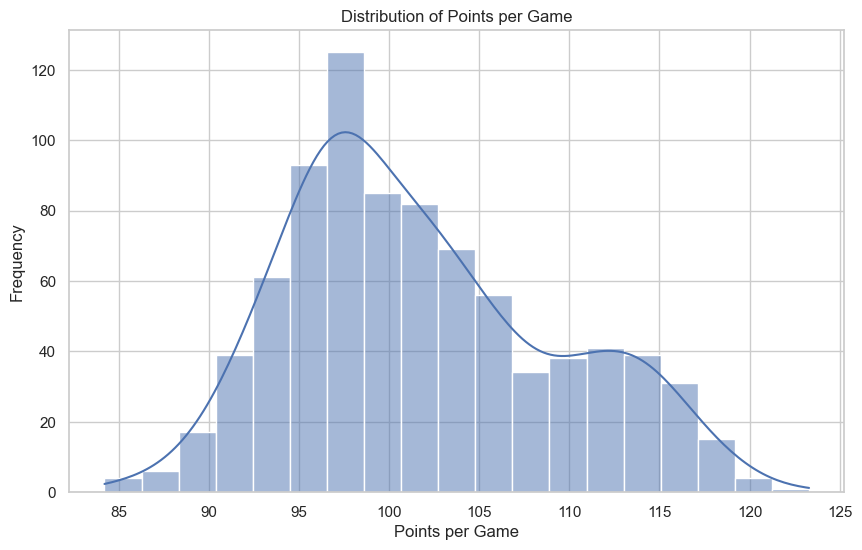

In [373]:
# Example of data visualization
sns.set(style='whitegrid')

# Visualize the distribution of points per game
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['pts_per_game'], kde=True)
plt.title('Distribution of Points per Game')
plt.xlabel('Points per Game')
plt.ylabel('Frequency')
plt.show()



In [374]:


# Function to convert percentage strings to float
def convert_percentage_to_float(s):
    if isinstance(s, str) and '%' in s:
        return float(s.replace('%', '')) / 100
    return s

# Function to convert rank strings to numeric values
def convert_rank_to_numeric(s):
    if isinstance(s, str) and 'th' in s:
        return int(s.split('th')[0])
    if isinstance(s, str) and 'st' in s:
        return int(s.split('st')[0])
    if isinstance(s, str) and 'nd' in s:
        return int(s.split('nd')[0])
    if isinstance(s, str) and 'rd' in s:
        return int(s.split('rd')[0])
    return s

# Function to calculate performance score
def calculate_performance_score(df, coach):
    metrics = [
        'wins', 'win_loss_pct', 'rank_team', 'srs', 'pace', 'rel_pace',
        'off_rtg', 'rel_off_rtg', 'def_rtg', 'rel_def_rtg', 'fg_per_game', 'fga_per_game', 'fg_pct', '3p_per_game', '3pa_per_game',
        '3p_pct', '2p_per_game', '2pa_per_game', '2p_pct', 'ft_per_game', 'fta_per_game',
        'ft_pct', 'orb_per_game', 'drb_per_game', 'trb_per_game', 'ast_per_game', 'stl_per_game',
        'blk_per_game', 'pts_per_game'
    ]
    
    yoy_metrics = [metric + '_yoy' for metric in metrics]
    rank_metrics = [metric + '_rank' for metric in metrics]
    
    coach_data = df[df['coaches'] == coach].copy()
    performance_score = 0
    weight_yoy = 0.7
    weight_rank = 0.4

    # Get team context before coach's tenure
    team_context = df[(df['team'] == coach_data['team'].iloc[0]) & (df['season'] < coach_data['season'].min())]
    if not team_context.empty:
        team_context[metrics] = team_context[metrics].applymap(convert_rank_to_numeric)
        team_context_mean = team_context[metrics].mean()
    else:
        team_context_mean = pd.Series(0, index=metrics)  # Default to 0 if no prior data

    for season in coach_data['season'].unique():
        season_data = coach_data[coach_data['season'] == season]
        season_performance = 0
        
        for metric in yoy_metrics:
            if metric in season_data.columns:
                season_data[metric] = season_data[metric].apply(convert_percentage_to_float)
                season_performance += season_data[metric].mean() * weight_yoy
        
        for metric in rank_metrics:
            if metric in season_data.columns:
                season_data[metric] = season_data[metric].apply(convert_rank_to_numeric)
                season_performance += (1 / season_data[metric].mean()) * weight_rank
        
        performance_score += season_performance / len(coach_data['season'].unique())

    # Adjust performance score by team context
    team_adjustment_factor = team_context_mean.mean()
    performance_score = performance_score / team_adjustment_factor if team_adjustment_factor != 0 else performance_score

    return performance_score

# Prepare the data
unique_coaches = merged_df[['coaches']].drop_duplicates().reset_index(drop=True)

# Initialize a list to store performance scores
coach_performance = []

# Calculate metrics for each coach's tenure
for coach in unique_coaches['coaches']:
    score = calculate_performance_score(merged_df, coach)
    coach_performance.append({'coach': coach, 'performance_score': score})

# Create final DataFrame
performance_df = pd.DataFrame(coach_performance)

# Display the performance DataFrame
print(performance_df)

# Save the performance DataFrame to a CSV file if needed
performance_df.to_csv('coach_performance.csv', index=False)


/var/folders/5_/07f7zfls3pj0vw0_2dlbcr580000gn/T/ipykernel_41637/3610266444.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  team_context[metrics] = team_context[metrics].applymap(convert_rank_to_numeric)
/var/folders/5_/07f7zfls3pj0vw0_2dlbcr580000gn/T/ipykernel_41637/3610266444.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_context[metrics] = team_context[metrics].applymap(convert_rank_to_numeric)
/var/folders/5_/07f7zfls3pj0vw0_2dlbcr580000gn/T/ipykernel_41637/3610266444.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

              coach  performance_score
0         Q. Snyder           0.007495
1       N. McMillan           0.009657
2         L. Pierce           0.004761
3    M. Budenholzer           0.009895
4           L. Drew           0.004919
..              ...                ...
147        J. Sloan           0.375475
148       W. Unseld           0.136600
149     L. Hamilton           0.002009
150        G. Heard           0.008159
151        J. Lynam           0.010177

[152 rows x 2 columns]


/var/folders/5_/07f7zfls3pj0vw0_2dlbcr580000gn/T/ipykernel_41637/3610266444.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  team_context[metrics] = team_context[metrics].applymap(convert_rank_to_numeric)
/var/folders/5_/07f7zfls3pj0vw0_2dlbcr580000gn/T/ipykernel_41637/3610266444.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_context[metrics] = team_context[metrics].applymap(convert_rank_to_numeric)
/var/folders/5_/07f7zfls3pj0vw0_2dlbcr580000gn/T/ipykernel_41637/3610266444.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  team_context[metrics] = team_context[metrics].applymap(convert_rank_to_numeric)
/var/folders/5_/07f7zfls3pj0vw0_2dlbcr580000gn/T/ipyk

In [375]:
# Ensure NumPy is imported correctly
print("NumPy version:", np.__version__)

# Define the neural network model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(64, 32)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

NumPy version: 1.23.5


In [376]:
merged_df.dtypes

team                         object
season               datetime64[ns]
wins                          int64
losses                        int64
win_loss_pct                float64
                          ...      
pts_rank                    float64
roster_continuity           float64
wins_ou                     float64
Likelihood                  float64
year                          int32
Length: 92, dtype: object

In [377]:
spear_stats = []

# Loop through columns and calculate Spearman correlation with 'wins'
for col in merged_df.columns:
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(merged_df[col]):
        x = merged_df[col]
        y = merged_df['wins']
        res = stats.spearmanr(x, y)
        spear_stats.append({'stat': col, 'Spearman_score': res.statistic})
        print(f'Spearman correlation of {col} with wins: statistic={res.statistic}, p-value={res.pvalue}')


Spearman correlation of wins with wins: statistic=1.0, p-value=0.0
Spearman correlation of losses with wins: statistic=-0.9480232309449095, p-value=0.0
Spearman correlation of win_loss_pct with wins: statistic=0.9847173689071003, p-value=0.0
Spearman correlation of srs with wins: statistic=0.9532169243855978, p-value=0.0
Spearman correlation of pace with wins: statistic=-0.10093029081967984, p-value=0.003407525129873543
Spearman correlation of rel_pace with wins: statistic=-0.1390421465385867, p-value=5.266375033986963e-05
Spearman correlation of off_rtg with wins: statistic=0.5387473979805553, p-value=2.094254206014868e-64
Spearman correlation of rel_off_rtg with wins: statistic=0.7521930839075367, p-value=5.725712244330583e-154
Spearman correlation of def_rtg with wins: statistic=-0.5261994535520036, p-value=5.3133537497421315e-61
Spearman correlation of rel_def_rtg with wins: statistic=-0.7327412015410324, p-value=3.0812517626623766e-142
Spearman correlation of outcome with wins: st

In [378]:
spear_df = pd.DataFrame(spear_stats)
spear_df.sort_values(by = ['Spearman_score'])
print(spear_df.to_string())
#consider using outcome instead of wins
#['srs','rel_pace', 'rel_off_rtg','rel_def_rtg', 'avg_age' , 'fg_per_game', 'fg_pct', '3p_pct', 'ft_per_game', 'pts_rank', 'trb_per_game','ast_per_game','blk_per_game', 'tov_per_game', 'roster_continuity']

                 stat  Spearman_score
0                wins        1.000000
1              losses       -0.948023
2        win_loss_pct        0.984717
3                 srs        0.953217
4                pace       -0.100930
5            rel_pace       -0.139042
6             off_rtg        0.538747
7         rel_off_rtg        0.752193
8             def_rtg       -0.526199
9         rel_def_rtg       -0.732741
10            outcome        0.857554
11            avg_age        0.535462
12         avg_weight        0.053050
13        fg_per_game        0.212278
14       fga_per_game       -0.112423
15             fg_pct        0.545604
16        3p_per_game        0.118296
17       3pa_per_game        0.065034
18             3p_pct        0.444611
19        2p_per_game        0.090154
20       2pa_per_game       -0.152868
21             2p_pct        0.363896
22        ft_per_game        0.173615
23       fta_per_game        0.115047
24             ft_pct        0.134656
25       orb

In [379]:
# Ensure the height conversion function is correct
def convert_height_to_float(height_str):
    if isinstance(height_str, str) and '-' in height_str:
        feet, inches = height_str.split('-')
        return float(feet) + float(inches) / 12
    return height_str  # Return the original value if it doesn't match the pattern

# Convert percentage strings to numerical values
def convert_percentage_to_float(s):
    if isinstance(s, str) and '%' in s:
        return float(s.replace('%', '')) / 100
    return s

# Apply conversions
for col in merged_df.columns:
    merged_df[col] = merged_df[col].apply(convert_percentage_to_float)
    if col == 'avg_height':
        merged_df[col] = merged_df[col].apply(convert_height_to_float)

# Drop rows with missing values
merged_df = merged_df.dropna()

# Create features and target variables
features = merged_df.drop(columns=['team', 'season', 'wins', 'losses', 'win_loss_pct', 'rank_team', 'playoffs', 'coaches', 'avg_weight_rank', 'outcome', 'year', 'avg_weight'])
target = merged_df['wins']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

# Create dataset and split into training and validation sets
dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

# Initialize the model, loss function, and optimizer
model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss}, Validation Loss: {val_loss}')

Epoch 1/100, Train Loss: 1727.1478199678309, Validation Loss: 1665.993679470486
Epoch 2/100, Train Loss: 1395.9804741354549, Validation Loss: 1114.618604871962
Epoch 3/100, Train Loss: 630.342388826258, Validation Loss: 325.34878709581164
Epoch 4/100, Train Loss: 208.25853953642005, Validation Loss: 134.463747660319
Epoch 5/100, Train Loss: 151.64419219073127, Validation Loss: 98.3601582845052
Epoch 6/100, Train Loss: 122.29637460147633, Validation Loss: 85.55167897542317
Epoch 7/100, Train Loss: 113.02159746955422, Validation Loss: 72.77289030287001
Epoch 8/100, Train Loss: 99.6763651230756, Validation Loss: 65.0082613627116
Epoch 9/100, Train Loss: 90.41059426700367, Validation Loss: 60.736852433946396
Epoch 10/100, Train Loss: 80.56407849928912, Validation Loss: 54.89228524102105
Epoch 11/100, Train Loss: 72.50268319073845, Validation Loss: 50.81831296284994
Epoch 12/100, Train Loss: 76.08164708754596, Validation Loss: 46.88919364081489
Epoch 13/100, Train Loss: 73.7782379879671, Va

In [380]:
import numpy as np
import torch


# Evaluate the neural network model
model.eval()
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Ensure the model is on the same device as the tensors
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
X_test_tensor = X_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

with torch.no_grad():
    outputs = model(X_test_tensor)
    print("Outputs:", outputs)  # Check if the model outputs correctly
    outputs_flat = outputs.flatten()
    print("Flattened Outputs:", outputs_flat)  # Check the flattened tensor
    outputs_detached = outputs_flat.detach()
    print("Detached Outputs:", outputs_detached)  # Check the detached tensor

    # Reimport NumPy before conversion
    import numpy as np
    nn_predictions = outputs_detached.cpu().numpy()
    print("NN Predictions (NumPy):", nn_predictions)  # Check the final NumPy array

nn_mae = mean_absolute_error(y_test, nn_predictions)
print(f'Neural Network MAE: {nn_mae}')

# Create a DataFrame to compare actual vs predicted
comparison_df = pd.DataFrame({
    'Actual Wins': y_test,
    'Predicted Wins': nn_predictions
})

# Display the comparison DataFrame
print(comparison_df)


Outputs: 

tensor([[48.0484],
        [25.3264],
        [51.0801],
        [38.0546],
        [35.8907],
        [37.2320],
        [51.8013],
        [42.2708],
        [23.2709],
        [40.3274],
        [40.9927],
        [42.7492],
        [20.3314],
        [45.3911],
        [54.0334],
        [63.7008],
        [40.9355],
        [36.5146],
        [30.3116],
        [39.3207],
        [37.1782],
        [41.9823],
        [22.3206],
        [43.5825],
        [54.4032],
        [50.9680],
        [47.5619],
        [32.5411],
        [40.6627],
        [33.1545],
        [28.9236],
        [36.1686],
        [47.4793],
        [31.6606],
        [40.0353],
        [24.9016],
        [25.0316],
        [18.1675],
        [28.0676],
        [37.5061],
        [29.2759],
        [23.3004],
        [36.5398],
        [44.8014],
        [44.0943],
        [49.5343],
        [18.3481],
        [48.0914],
        [50.2467],
        [37.7617],
        [30.9412],
        [57.2072],
        [48.

In [381]:
# Calculate performance scores for each coach
coaches_performance = []

for coach in merged_df['coaches'].unique():
    coach_data = merged_df[merged_df['coaches'] == coach]
    previous_season_data = coach_data.shift(1).dropna(subset=['wins'])  # Data from the previous season
    current_season_data = coach_data.dropna(subset=['wins'])

    if not previous_season_data.empty and not current_season_data.empty:
        # Predict wins for the current season using previous season data
        previous_season_features = previous_season_data.drop(columns=['team', 'season', 'wins', 'losses', 'win_loss_pct', 'rank_team', 'playoffs', 'coaches'])
        previous_season_features = scaler.transform(previous_season_features)
        
        with torch.no_grad():
            previous_season_tensor = torch.tensor(previous_season_features, dtype=torch.float32)
            predicted_wins = model(previous_season_tensor).flatten().cpu().numpy()
        
        actual_wins = current_season_data['wins'].values
        
        # Calculate the difference
        performance_score = actual_wins - predicted_wins
        coaches_performance.append({
            'coach': coach,
            'performance_score': performance_score.mean()
        })

# Create a DataFrame for coach performance scores
performance_df = pd.DataFrame(coaches_performance)
print(performance_df)

# Save the performance DataFrame to a CSV file if needed
performance_df.to_csv('coach_performance_comparison.csv', index=False)

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

Coach: Q. Snyder
Predicted Wins: [40.20987]
Actual Wins: 36
Lengths - Predicted: 1, Actual: 1
Coach: Q. Snyder
Predicted Wins: [55.396152]
Actual Wins: 49
Lengths - Predicted: 1, Actual: 1
Coach: Q. Snyder
Predicted Wins: [42.947643]
Actual Wins: 52
Lengths - Predicted: 1, Actual: 1
Coach: Q. Snyder
Predicted Wins: [49.696514]
Actual Wins: 44
Lengths - Predicted: 1, Actual: 1
Coach: Q. Snyder
Predicted Wins: [46.129665]
Actual Wins: 50
Lengths - Predicted: 1, Actual: 1
Coach: Q. Snyder
Predicted Wins: [51.881584]
Actual Wins: 48
Lengths - Predicted: 1, Actual: 1
Coach: Q. Snyder
Predicted Wins: [40.773052]
Actual Wins: 51
Lengths - Predicted: 1, Actual: 1
Coach: Q. Snyder
Predicted Wins: [32.916187]
Actual Wins: 40
Lengths - Predicted: 1, Actual: 1
Coach: Q. Snyder
Predicted Wins: [20.825285]
Actual Wins: 38
Lengths - Predicted: 1, Actual: 1
Coach: N. McMillan
Predicted Wins: [41.01999]
Actual Wins: 41
Lengths - Predicted: 1, Actual: 1
Coach: N. McMillan
Predicted Wins: [38.67989]
Actu

In [382]:
total_diff = performance_df['performance_score'].sum()
print(total_diff)

1006.6393795013428


In [383]:
import pandas as pd
import torch

# Convert the 'season' column to datetime and extract the year
merged_df['season'] = pd.to_datetime(merged_df['season']).dt.year

# Calculate performance scores for each coach
coaches_performance = []

for coach in merged_df['coaches'].unique():
    coach_data = merged_df[merged_df['coaches'] == coach]
    
    for index, current_season_data in coach_data.iterrows():
        current_team = current_season_data['team']
        current_season = current_season_data['season']
        
        # Find the previous season data for the same team
        previous_season_data = merged_df[(merged_df['team'] == current_team) & (merged_df['season'] == current_season - 1)]
        
        if not previous_season_data.empty:
            # Predict wins for the current season using previous season data
            previous_season_features = previous_season_data.drop(columns=['team', 'season', 'wins', 'losses', 'win_loss_pct', 'rank_team', 'playoffs', 'coaches', 'avg_weight_rank', 'outcome', 'year', 'avg_weight'])
            previous_season_features = scaler.transform(previous_season_features)
            
            with torch.no_grad():
                previous_season_tensor = torch.tensor(previous_season_features, dtype=torch.float32)
                predicted_wins = model(previous_season_tensor).flatten().cpu().numpy()
            
            actual_wins = current_season_data['wins']
            
            # Debugging: Print lengths and contents
            print(f"Coach: {coach}")
            print(f"Team: {current_team}")
            print(f"Season: {current_season}")
            print(f"Predicted Wins: {predicted_wins}")
            print(f"Actual Wins: {actual_wins}")
            
            # Ensure the lengths match by trimming the longer array
            if len(predicted_wins) > 1:
                predicted_wins = predicted_wins[:1]
            
            # Calculate the difference
            performance_score = actual_wins - predicted_wins[0]
            coaches_performance.append({
                'coach': coach,
                'team': current_team,
                'season': current_season,
                'predicted_wins': predicted_wins[0],
                'actual_wins': actual_wins,
                'performance_score': performance_score
            })

# Create a DataFrame for coach performance scores
performance_df = pd.DataFrame(coaches_performance)
print(performance_df)

# Save the performance DataFrame to a CSV file if needed
performance_df.to_csv('coach_performance_comparison.csv', index=False)


Empty DataFrame
Columns: []
Index: []


In [384]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate the Random Forest model
rf_predictions = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_predictions)
print(f'Random Forest MAE: {rf_mae}')


Random Forest MAE: 2.896904761904762
